Epoch 1/50, Misclassified: 1
Epoch 2/50, Misclassified: 0


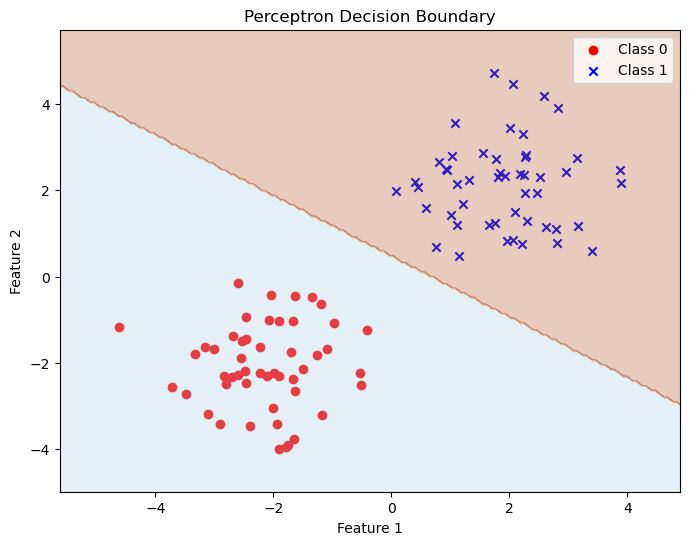

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_dim + 1)
    
    def activation(self, x):
        """Step function"""
        return np.where(x >= 0, 1, 0)
    
    def predict(self, X):
        """Predict binary class (0 or 1)"""
        X_bias = np.c_[X, np.ones((X.shape[0], 1))]  
        linear_output = np.dot(X_bias, self.weights)
        return self.activation(linear_output)
    
    def fit(self, X, y):
        """Train perceptron using PLA"""
        X_bias = np.c_[X, np.ones((X.shape[0], 1))]
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X_bias, y):
                update = self.lr * (target - self.activation(np.dot(xi, self.weights)))
                self.weights += update * xi
                errors += int(update != 0.0)
            print(f"Epoch {epoch+1}/{self.epochs}, Misclassified: {errors}")
            if errors == 0: 
                break
    
    def plot_decision_boundary(self, X, y):
        """Visualize decision boundary (only for 2D features)"""
        plt.figure(figsize=(8,6))
        
        plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', marker='x', label='Class 1')
        x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
        y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        grid = np.c_[xx.ravel(), yy.ravel()]
        preds = self.predict(grid).reshape(xx.shape)
 
        plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Paired)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title("Perceptron Decision Boundary")
        plt.show()
if __name__ == "__main__":
    np.random.seed(42)
    X_class0 = np.random.randn(50, 2) - [2, 2]
    X_class1 = np.random.randn(50, 2) + [2, 2]
    X = np.vstack((X_class0, X_class1))
    y = np.hstack((np.zeros(50), np.ones(50)))
    model = Perceptron(input_dim=2, learning_rate=0.1, epochs=50)
    model.fit(X, y)
    model.plot_decision_boundary(X, y)